<a href="https://colab.research.google.com/github/Abdodusoky/Company/blob/main/Nasa_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time

# Step 1: Load the dataset you already have
file_path = "/content/SB_publication_PMC.csv"
df = pd.read_csv(file_path)

# Step 2: Function to fetch abstract/content from link
def fetch_content(url):
    try:
        headers = {"User-Agent": "Mozilla/5.0"}
        response = requests.get(url, headers=headers, timeout=10)
        if response.status_code != 200:
            return ""
        soup = BeautifulSoup(response.text, "html.parser")

        # Try different possible abstract containers
        abstract = soup.find("div", class_="abstr")
        if not abstract:
            abstract = soup.find("section", id="abstract")
        if not abstract:
            abstract = soup.find("div", {"id": "abstract"})

        if abstract:
            return abstract.get_text(" ", strip=True)
        else:
            return ""
    except Exception as e:
        print("⚠️ Error fetching:", url, e)
        return ""

# Step 3: Fetch content for each link (slow if many)
df["content"] = df["Link"].apply(fetch_content)

# Step 4: Save combined dataset
output_path = "SB_publication_PMC_phase1.csv"
df.to_csv(output_path, index=False)

print("✅ Phase 1 complete. Data saved to", output_path)
print(df.head())


✅ Phase 1 complete. Data saved to SB_publication_PMC_phase1.csv
                                               Title  \
0  Mice in Bion-M 1 space mission: training and s...   
1  Microgravity induces pelvic bone loss through ...   
2  Stem Cell Health and Tissue Regeneration in Mi...   
3  Microgravity Reduces the Differentiation and R...   
4  Microgravity validation of a novel system for ...   

                                                Link content  
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...          
1  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...          
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...          
3  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...          
4  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...          


In [13]:
import pandas as pd
import re
import nltk

# تحميل الموارد (مرة واحدة فقط)
nltk.download("punkt")

# ---------- 1. Load dataset ----------
df = pd.read_csv("SB_publication_PMC_phase1.csv")

# ---------- 2. دمج العنوان مع المحتوى ----------
df["text"] = df["Title"].fillna("") + " " + df["content"].fillna("")

# ---------- 3. Function للتنضيف البسيط ----------
def clean_text_simple(text):
    if not isinstance(text, str):  # لو مش نص
        return ""
    text = text.lower()
    text = re.sub(r"[^a-z\s]", " ", text)  # نشيل الرموز ونخلي مسافات
    tokens = text.split()
    return " ".join(tokens)

# ---------- 4. Apply cleaning ----------
df["Clean_Abstract"] = df["text"].apply(clean_text_simple)

# ---------- 5. Save ----------
df.to_csv("SB_publication_PMC_phase2.csv", index=False)

print("✅ Phase 2 completed and saved in SB_publication_PMC_phase2.csv")


✅ Phase 2 completed and saved in SB_publication_PMC_phase2.csv


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
import pandas as pd

df = pd.read_csv("/content/SB_publication_PMC_phase1.csv")
print(df.columns)
print(df.head())


Index(['Title', 'Link', 'content'], dtype='object')
                                               Title  \
0  Mice in Bion-M 1 space mission: training and s...   
1  Microgravity induces pelvic bone loss through ...   
2  Stem Cell Health and Tissue Regeneration in Mi...   
3  Microgravity Reduces the Differentiation and R...   
4  Microgravity validation of a novel system for ...   

                                                Link  content  
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...      NaN  
1  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...      NaN  
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...      NaN  
3  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...      NaN  
4  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...      NaN  


In [15]:
!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.9/131.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.0/208.0 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.4 MB/s eta 

In [16]:
import pandas as pd

df = pd.read_csv("SB_publication_PMC_phase2.csv")
print(df["Clean_Abstract"].head())
print(df["Clean_Abstract"].apply(len).describe())  # احصائيات الطول


0    mice in bion m space mission training and sele...
1    microgravity induces pelvic bone loss through ...
2    stem cell health and tissue regeneration in mi...
3    microgravity reduces the differentiation and r...
4    microgravity validation of a novel system for ...
Name: Clean_Abstract, dtype: object
count    607.000000
mean     101.879736
std       31.291566
min       14.000000
25%       81.000000
50%      100.000000
75%      121.500000
max      216.000000
Name: Clean_Abstract, dtype: float64


In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import chromadb

# ---------- 1. Load preprocessed dataset ----------
df = pd.read_csv("SB_publication_PMC_phase2.csv")

# ---------- 2. Prepare text ----------
texts = df["Clean_Abstract"].fillna("").tolist()
titles = df["Title"].fillna("").tolist()
ids = [str(i) for i in range(len(texts))]

# ---------- 3. TF-IDF vectorization ----------
vectorizer = TfidfVectorizer(max_features=512)  # تقليل الأبعاد للسرعة
tfidf_matrix = vectorizer.fit_transform(texts).toarray()

# ---------- 4. Initialize ChromaDB ----------
chroma_client = chromadb.Client()
collection = chroma_client.create_collection(name="space_biology_tfidf")

# ---------- 5. Insert embeddings ----------
collection.add(
    embeddings=tfidf_matrix,
    documents=texts,
    metadatas=[{"title": t} for t in titles],
    ids=ids
)

print("✅ Phase 3 completed with TF-IDF embeddings stored in ChromaDB")

# ---------- 6. Test query ----------
query = "microgravity effects on bone density"
query_vec = vectorizer.transform([query]).toarray()

results = collection.query(
    query_embeddings=query_vec,
    n_results=3
)

print("\n🔍 Query:", query)
for doc, meta in zip(results["documents"][0], results["metadatas"][0]):
    print("📄 Title:", meta["title"])
    print("📝 Abstract snippet:", doc[:200], "...\n")


✅ Phase 3 completed with TF-IDF embeddings stored in ChromaDB

🔍 Query: microgravity effects on bone density
📄 Title: Multiscale effects of spaceflight on murine tendon and bone
📝 Abstract snippet: multiscale effects of spaceflight on murine tendon and bone ...

📄 Title: Partial reductions in mechanical loading yield proportional changes in bone density, bone architecture, and muscle mass
📝 Abstract snippet: partial reductions in mechanical loading yield proportional changes in bone density bone architecture and muscle mass ...

📄 Title: Increasing the number of unloading/reambulation cycles does not adversely impac body composition and lumbar bone mineral density but reduces tissue sensitivity
📝 Abstract snippet: increasing the number of unloading reambulation cycles does not adversely impac body composition and lumbar bone mineral density but reduces tissue sensitivity ...



📊 Dataset Shape: (607, 6)
📊 Average words per abstract: 13.899505766062603
📊 Top 5 longest abstracts:
                                                 Title  text_length
454  Blocking SARS-CoV-2 Delta variant (B.1.617.2) ...           33
155  Environmental cues and symbiont microbe-associ...           28
343  Resistance of Bacillus subtilis Spore DNA to L...           27
58   Treatment with a soluble bone morphogenetic pr...           26
469  Room temperature housing results in premature ...           26


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


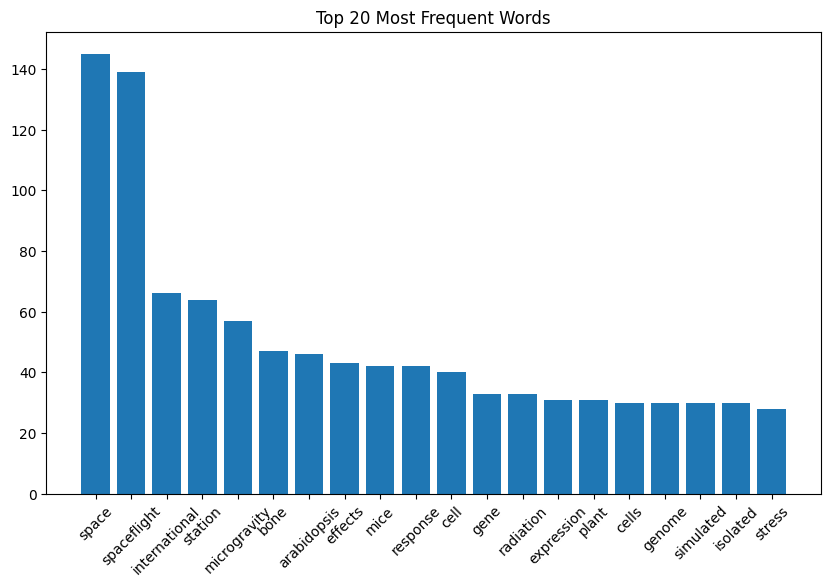

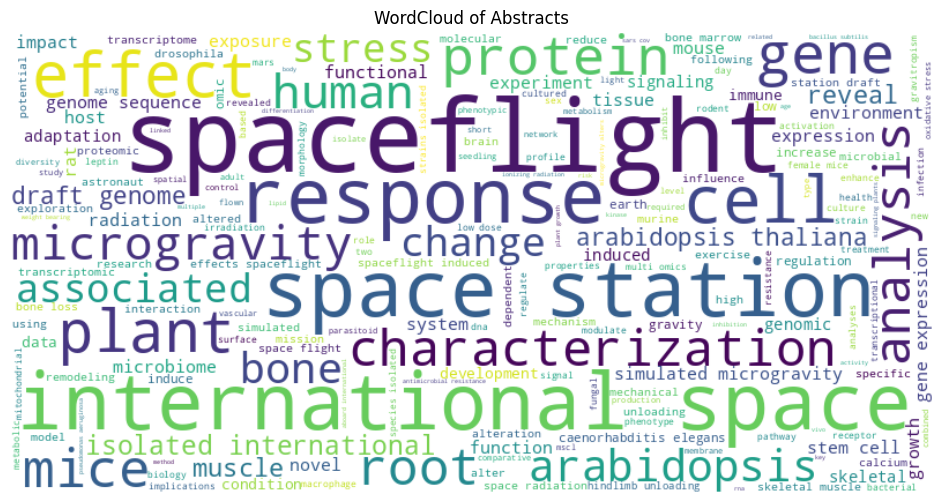

✅ Phase 4 completed. Plots shown and stats saved in SB_publication_PMC_phase4_stats.csv


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk

# تحميل كلمات التوقف (مرة واحدة فقط)
nltk.download("stopwords")
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

# ---------- 1. Load dataset ----------
df = pd.read_csv("SB_publication_PMC_phase2.csv")

# ---------- 2. Basic Statistics ----------
df["text_length"] = df["Clean_Abstract"].apply(lambda x: len(str(x).split()))

print("📊 Dataset Shape:", df.shape)
print("📊 Average words per abstract:", df["text_length"].mean())
print("📊 Top 5 longest abstracts:")
print(df.sort_values("text_length", ascending=False)[["Title", "text_length"]].head())

# ---------- 3. Word Frequency ----------
all_words = " ".join(df["Clean_Abstract"].astype(str)).split()
filtered_words = [w for w in all_words if w not in stop_words and len(w) > 2]

word_freq = Counter(filtered_words).most_common(20)

# Bar Plot
plt.figure(figsize=(10,6))
plt.bar([w[0] for w in word_freq], [w[1] for w in word_freq])
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words")
plt.show()

# ---------- 4. WordCloud ----------
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(filtered_words))

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Abstracts")
plt.show()

# ---------- 5. Save Stats ----------
df[["Title", "text_length"]].to_csv("SB_publication_PMC_phase4_stats.csv", index=False)

print("✅ Phase 4 completed. Plots shown and stats saved in SB_publication_PMC_phase4_stats.csv")



In [19]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# ---------- 1. Load dataset ----------
df = pd.read_csv("SB_publication_PMC_phase2.csv")

# ---------- 2. Vectorize text ----------
vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, stop_words="english"
)
dtm = vectorizer.fit_transform(df["Clean_Abstract"].astype(str))

# ---------- 3. Apply LDA ----------
lda = LatentDirichletAllocation(
    n_components=5,   # عدد الموضوعات
    random_state=42
)
lda.fit(dtm)

# ---------- 4. Display Topics ----------
def display_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics[f"Topic {topic_idx+1}"] = top_features
    return topics

topics = display_topics(lda, vectorizer.get_feature_names_out(), 10)

# ---------- 5. Assign Topic to Each Document ----------
topic_values = lda.transform(dtm)
df["Dominant_Topic"] = topic_values.argmax(axis=1) + 1

# ---------- 6. Save Results ----------
df.to_csv("SB_publication_PMC_phase5_topics.csv", index=False)

print("✅ Phase 5 completed. Topics extracted and saved in SB_publication_PMC_phase5_topics.csv")
print("\n📊 Top Keywords per Topic:")
for topic, words in topics.items():
    print(f"{topic}: {', '.join(words)}")


✅ Phase 5 completed. Topics extracted and saved in SB_publication_PMC_phase5_topics.csv

📊 Top Keywords per Topic:
Topic 1: spaceflight, arabidopsis, response, growth, thaliana, microgravity, plant, stress, signaling, root
Topic 2: bone, mice, spaceflight, effects, microgravity, skeletal, muscle, unloading, radiation, simulated
Topic 3: space, international, genome, station, isolated, draft, sequences, spaceflight, gene, bacterial
Topic 4: space, spaceflight, human, cell, host, data, stem, changes, induced, cells
Topic 5: space, international, station, microbial, spaceflight, genomic, characterization, analysis, impact, mouse


In [20]:
!pip install streamlit

In [21]:
code = """
import streamlit as st
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# ---------- 1. Load dataset ----------
@st.cache_data
def load_data():
    df = pd.read_csv("SB_publication_PMC_phase5_topics.csv")
    df = df.dropna(subset=["Clean_Abstract"])
    return df

df = load_data()

# ---------- 2. Build TF-IDF Model ----------
@st.cache_resource
def build_index():
    vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
    X = vectorizer.fit_transform(df["Clean_Abstract"].astype(str))
    return vectorizer, X

vectorizer, X = build_index()

# ---------- 3. Streamlit UI ----------
st.title("🚀 Space Biology Knowledge Engine (TF-IDF Version)")
st.markdown("Ask questions and explore NASA Space Biology research papers")

query = st.text_input("🔍 Enter your question (e.g., 'How does microgravity affect bone health?')")

top_k = st.slider("Number of results", 3, 15, 5)

if query:
    # Convert query into vector
    query_vec = vectorizer.transform([query])

    # Compute cosine similarity
    similarities = cosine_similarity(query_vec, X).flatten()

    # Get top-k results
    top_indices = similarities.argsort()[::-1][:top_k]

    st.subheader("📑 Search Results:")
    for i, idx in enumerate(top_indices):
        st.write(f"### {i+1}. {df.iloc[idx]['Title']}")
        if "Dominant_Topic" in df.columns:
            st.write(f"**Topic:** {df.iloc[idx]['Dominant_Topic']}")
        st.write(f"[🔗 Read More]({df.iloc[idx]['Link']})")
        st.write(f"**Similarity Score:** {round(float(similarities[idx]), 4)}")
        st.markdown("---")
"""

# تخزين الكود في ملف app.py
with open("app.py", "w") as f:
    f.write(code)

print("✅ File saved as app.py")


✅ File saved as app.py


In [22]:
!pip install scikit-learn streamlit
!streamlit run app.py --server.port 8080 --server.address 0.0.0.0




2025-09-17 11:27:45.809 Port 8080 is already in use


In [23]:
!pip install pyngrok
